In [ ]:
# Can current housing dating be used to accurately predict the selling price of a home?

In [2]:
import pandas as pd
import zipfile 
from pandas.io.json import json_normalize
import math
import numpy as np

In [3]:
zf = zipfile.ZipFile('/Users/andrewwalnum/Downloads/kc_house_data.csv.zip') # having First.csv zipped file.
df = pd.read_csv(zf.open(zipfile.ZipFile.namelist(zf)[0]))

In [4]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
df['log_price'] = np.log(df.price)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100712
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,12.793859
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,12.899220
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,12.904459
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,12.899220


In [6]:
df.price.value_counts().head(10)

450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
325000.0    148
400000.0    145
375000.0    138
300000.0    133
525000.0    131
Name: price, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
log_price        21613 non-null float64
dtypes: float64(6), int64(15), object(1)
m

In [8]:
import matplotlib.pyplot as plt
import numpy as py
import statsmodels.api as sm
import seaborn as sns

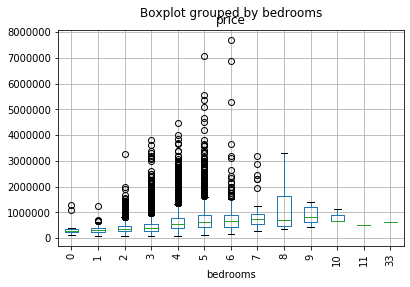

In [9]:
#check for outliers
df.boxplot(column='price', by='bedrooms', rot=90)

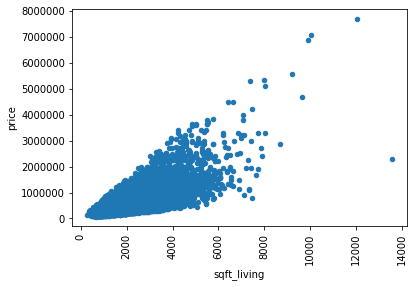

In [10]:
#Check for general trends. Is there a correlation between the square footage of a house and price?

df.plot(kind='scatter', x='sqft_living', y='price', rot=90)
plt.show()

In [11]:
#Double check for null/missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
log_price        0
dtype: int64

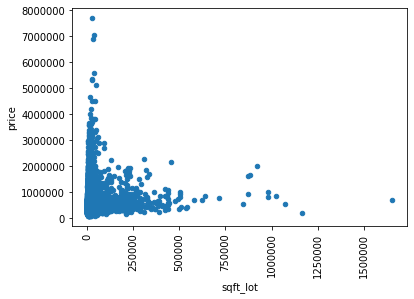

In [12]:
#Checking trends
df.plot(kind='scatter', x='sqft_lot', y='price', rot=90)
plt.show()

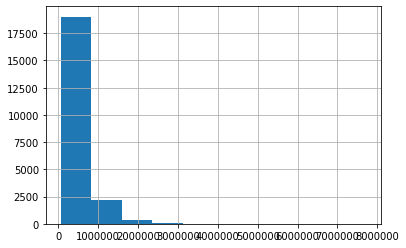

In [13]:
df.price.hist()
plt.show()

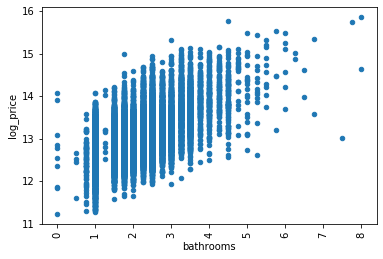

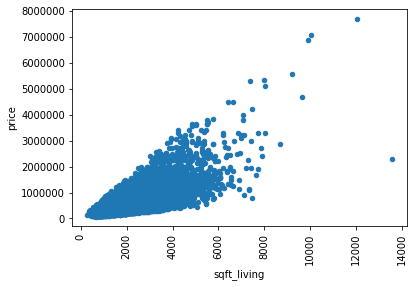

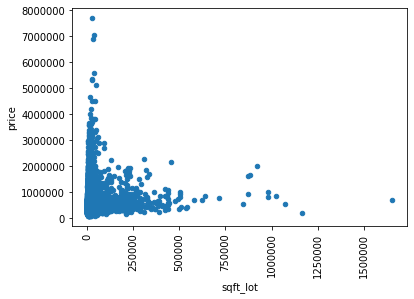

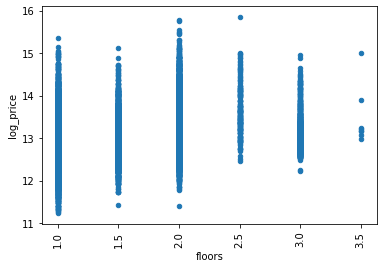

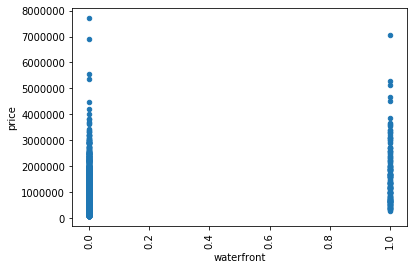

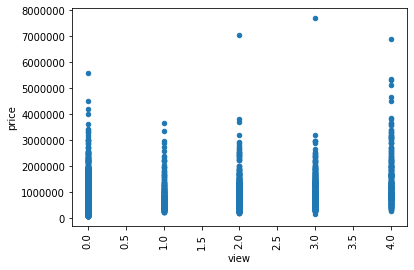

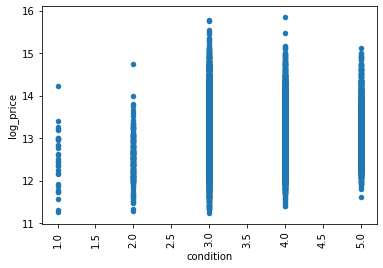

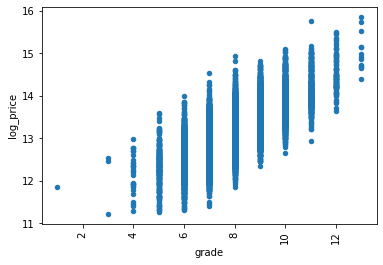

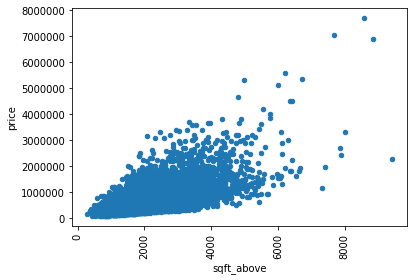

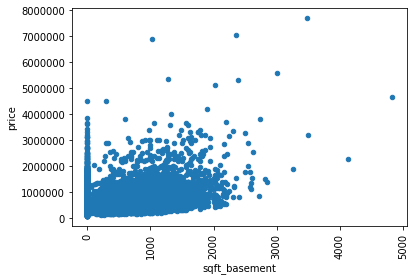

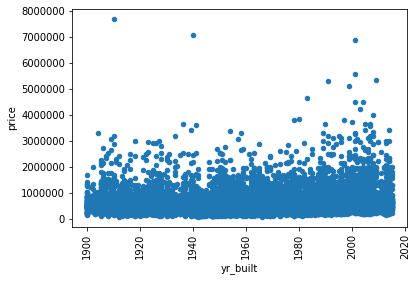

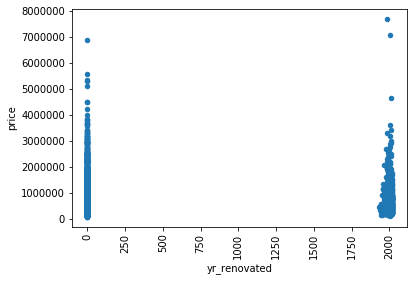

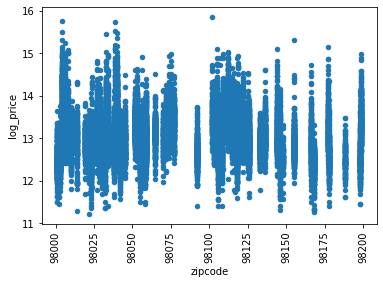

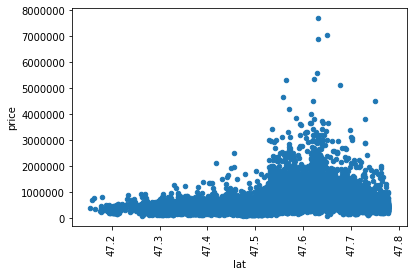

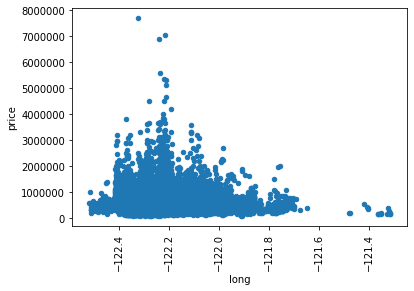

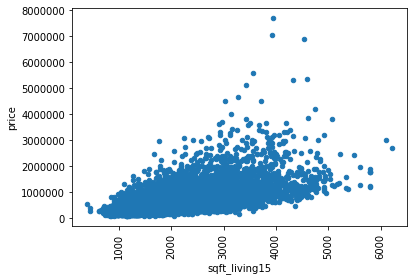

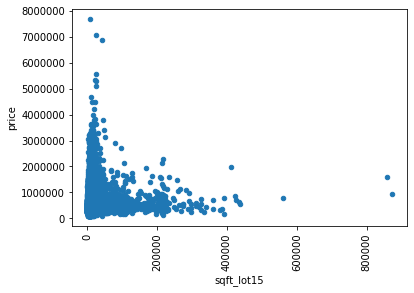

In [14]:
import math
df.plot(kind='scatter', x='bathrooms', y= 'log_price', rot=90)
plt.show()
df.plot(kind='scatter', x='sqft_living', y='price', rot=90)
plt.show()
df.plot(kind='scatter', x='sqft_lot', y='price', rot=90)
plt.show()
df.plot(kind='scatter', x='floors', y='log_price', rot=90)
plt.show()
df.plot(kind='scatter', x='waterfront', y='price', rot=90)
plt.show()
df.plot(kind='scatter', x='view', y='price', rot=90)
plt.show()
df.plot(kind='scatter', x='condition', y='log_price', rot=90)
plt.show()
df.plot(kind='scatter', x='grade', y='log_price', rot=90)
plt.show()
df.plot(kind='scatter', x='sqft_above', y='price', rot=90)
plt.show()
df.plot(kind='scatter', x='sqft_basement', y='price', rot=90)
plt.show()
df.plot(kind='scatter', x='yr_built', y='price', rot=90)
plt.show()
df.plot(kind='scatter', x='yr_renovated', y='price', rot=90)
plt.show()
df.plot(kind='scatter', x='zipcode', y='log_price', rot=90)
plt.show()
df.plot(kind='scatter', x='lat', y='price', rot=90)
plt.show()
df.plot(kind='scatter', x='long', y='price', rot=90)
plt.show()
df.plot(kind='scatter', x='sqft_living15', y='price', rot=90)
plt.show()
df.plot(kind='scatter', x='sqft_lot15', y='price', rot=90)
plt.show()

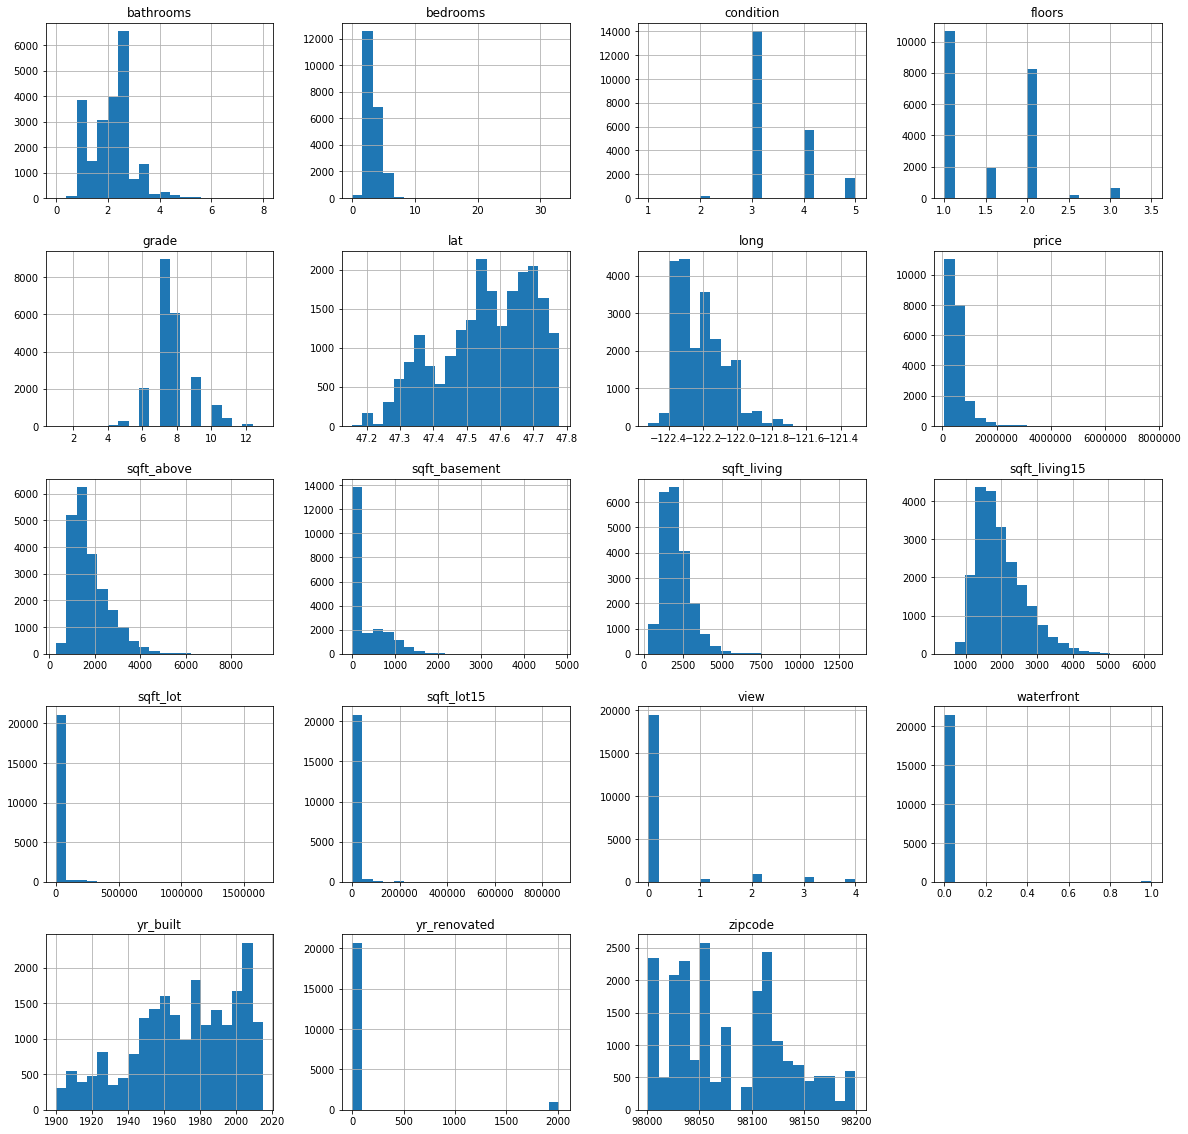

In [15]:
#Create histograms for checking trends rather than multiple scatter plots. What trends are visible from the histograms?

df1=df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = df1.hist(bins=20,figsize=(20,20),xlabelsize='10',ylabelsize='10',xrot=0)

[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

In [16]:
#Check to see the strength of trends using statistical analysis. Is there a stronger correlation among certain variables?

import statsmodels.api as sm    

X = df[['sqft_living', 'yr_built']]
y = df['price']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.840
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                          5.670e+04
Date:                Mon, 10 Feb 2020   Prob (F-statistic):                        0.00
Time:                        13:39:15   Log-Likelihood:                     -3.0025e+05
No. Observations:               21613   AIC:                                  6.005e+05
Df Residuals:                   21611   BIC:                                  6.005e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   283.1640      1.955    144.829      0.000     279.332     286.996
yr_built      -25.2616      2.255    -11.202      0.000     -29.682     -20.841
==============================================================================
Omnibus:                    14669.258   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           529509.424
Skew:                           2.783   Prob(JB):                         0.00
Kurtosis:                      26.601   Cond. No.                         4.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

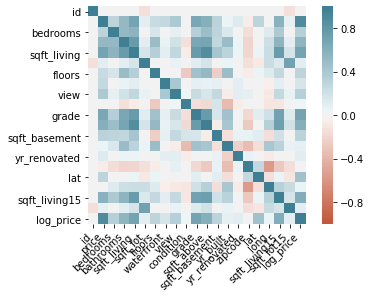

In [17]:
#heat map
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [18]:
X = df[['sqft_living', 'yr_built','lat','long']]
y = df['price']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                          3.430e+04
Date:                Mon, 10 Feb 2020   Prob (F-statistic):                        0.00
Time:                        13:39:15   Log-Likelihood:                     -2.9850e+05
No. Observations:               21613   AIC:                                  5.970e+05
Df Residuals:                   21609   BIC:                                  5.970e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   293.4527      1.906    153.973      0.000     289.717     297.188
yr_built    -2319.5622     57.089    -40.631      0.000   -2431.461   -2207.664
lat          5.391e+05   1.17e+04     46.192      0.000    5.16e+05    5.62e+05
long         1.729e+05   4641.990     37.256      0.000    1.64e+05    1.82e+05
==============================================================================
Omnibus:                    16478.612   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           824274.136
Skew:                           3.211   Prob(JB):                         0.00
Kurtosis:                      32.565   Cond. No.                     2.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
X = df[['sqft_living', 'yr_built','lat','long','sqft_above']]
y = df['price']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                          2.755e+04
Date:                Mon, 10 Feb 2020   Prob (F-statistic):                        0.00
Time:                        13:39:16   Log-Likelihood:                     -2.9846e+05
No. Observations:               21613   AIC:                                  5.969e+05
Df Residuals:                   21608   BIC:                                  5.970e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   265.1944      3.739     70.924      0.000     257.865     272.523
yr_built    -2494.7815     60.383    -41.316      0.000   -2613.136   -2376.427
lat          5.372e+05   1.17e+04     46.105      0.000    5.14e+05     5.6e+05
long         1.695e+05   4650.749     36.438      0.000     1.6e+05    1.79e+05
sqft_above     38.1820      4.349      8.779      0.000      29.657      46.707
==============================================================================
Omnibus:                    16561.844   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           831291.824
Skew:                           3.235   Prob(JB):                         0.00
Kurtosis:                      32.686   Cond. No.                     2.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
X = df[['sqft_living', 'yr_built','lat','long','sqft_above','sqft_basement']]
y = df['price']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                          2.755e+04
Date:                Mon, 10 Feb 2020   Prob (F-statistic):                        0.00
Time:                        13:39:16   Log-Likelihood:                     -2.9846e+05
No. Observations:               21613   AIC:                                  5.969e+05
Df Residuals:                   21608   BIC:                                  5.970e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     189.5236      1.447    130.991      0.000     186.688     192.360
yr_built      -2494.7815     60.383    -41.316      0.000   -2613.136   -2376.427
lat            5.372e+05   1.17e+04     46.105      0.000    5.14e+05     5.6e+05
long           1.695e+05   4650.749     36.438      0.000     1.6e+05    1.79e+05
sqft_above      113.8528      1.934     58.883      0.000     110.063     117.643
sqft_basement    75.6708      2.601     29.090      0.000      70.572      80.769
==============================================================================
Omnibus:                    16561.844   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           831291.824
Skew:                           3.235   Prob(JB):                         0.00
Kurtosis:                      32.686   Cond. No.                     3.71e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.97e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
#What is the equation for the regression line?

from sklearn.linear_model import LinearRegression
X = df[['sqft_living', 'grade', 'sqft_above','sqft_basement']]
y = df['price']
model_2 = LinearRegression().fit(X,y)

In [25]:
r_sq = model_2.score(X,y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5410567145098093


In [26]:
print('intercept:', model_2.intercept_)
print('slope:', model_2.coef_)

intercept: -651195.1249901921
slope: [1.30550465e+02 1.09985519e+05 2.64213100e+01 1.04129155e+02]
